In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('migraine_data.csv')

In [52]:
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [53]:
data.shape

(400, 24)

In [54]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [55]:
data.duplicated().sum()

6

#  Missing Values - 0
#  Duplicated Rows - 6

In [56]:
data.drop_duplicates(inplace=True)

In [57]:
data.shape

(394, 24)

In [58]:
data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,...,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0,394.000000,394.000000,394.000000
mean,31.695431,1.619289,2.365482,0.972081,0.977157,2.472081,0.987310,0.324873,0.977157,0.979695,...,0.002538,0.126904,0.060914,0.015228,0.005076,0.015228,0.0,0.017766,0.007614,0.408629
std,12.182607,0.773106,1.672537,0.270203,0.279924,0.771953,0.112077,0.468923,0.149592,0.141219,...,0.050379,0.333288,0.239476,0.122616,0.071156,0.122616,0.0,0.132270,0.087037,0.492206
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,3.750000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


 # Exploratory Data Analysis (EDA)

# Univariate Analysis

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          394 non-null    int64 
 1   Duration     394 non-null    int64 
 2   Frequency    394 non-null    int64 
 3   Location     394 non-null    int64 
 4   Character    394 non-null    int64 
 5   Intensity    394 non-null    int64 
 6   Nausea       394 non-null    int64 
 7   Vomit        394 non-null    int64 
 8   Phonophobia  394 non-null    int64 
 9   Photophobia  394 non-null    int64 
 10  Visual       394 non-null    int64 
 11  Sensory      394 non-null    int64 
 12  Dysphasia    394 non-null    int64 
 13  Dysarthria   394 non-null    int64 
 14  Vertigo      394 non-null    int64 
 15  Tinnitus     394 non-null    int64 
 16  Hypoacusis   394 non-null    int64 
 17  Diplopia     394 non-null    int64 
 18  Defect       394 non-null    int64 
 19  Ataxia       394 non-null    int64

<Axes: xlabel='Duration', ylabel='count'>

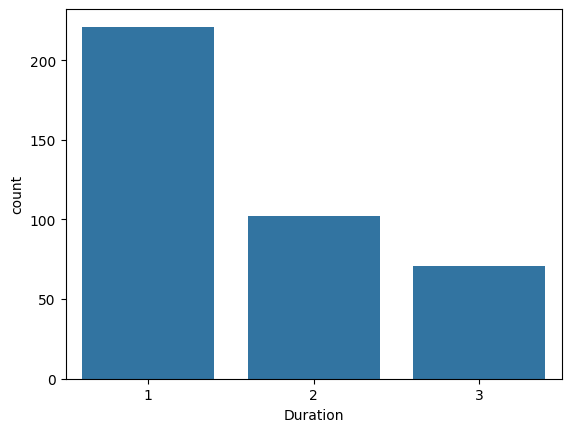

In [60]:
sns.countplot(x=data['Duration'])

<Axes: xlabel='Frequency', ylabel='count'>

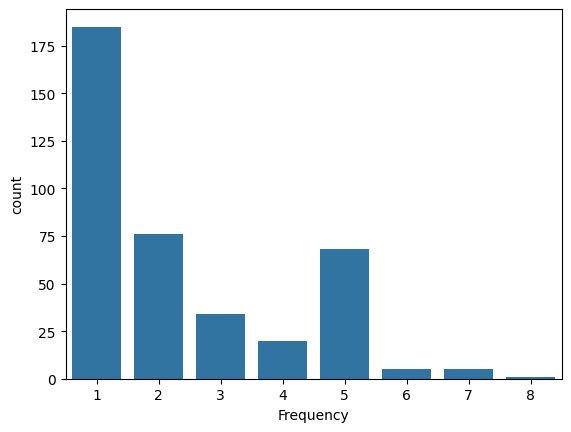

In [61]:
sns.countplot(x=data['Frequency'])

<Axes: xlabel='Intensity', ylabel='count'>

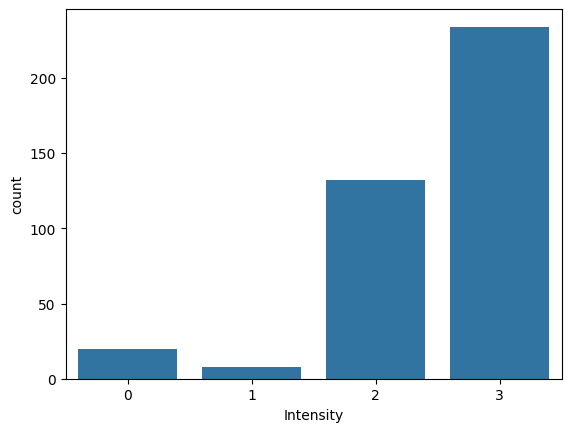

In [62]:
sns.countplot(x=data['Intensity'])

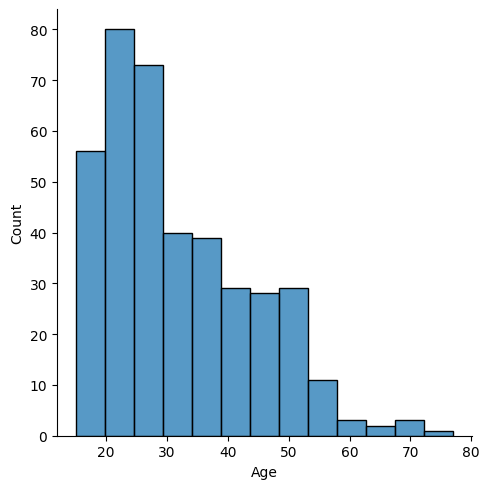

In [63]:
sns.displot(data['Age'])

In [64]:
data['Type'].value_counts()

Type
Typical aura with migraine       241
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Type'>

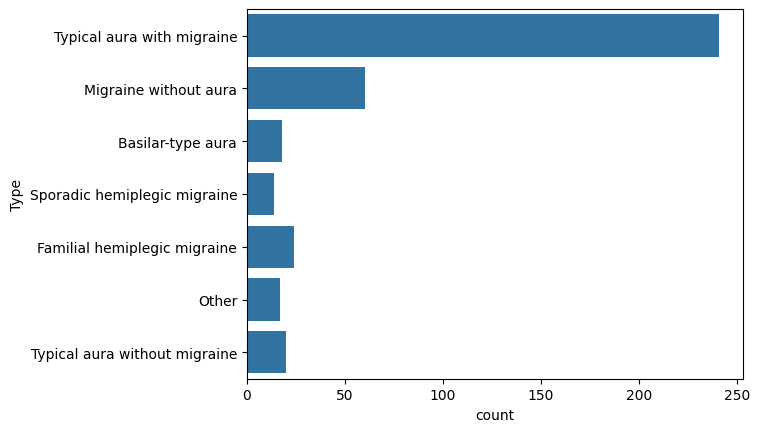

In [65]:
sns.countplot(y=data['Type'])

# Bivariate Analysis

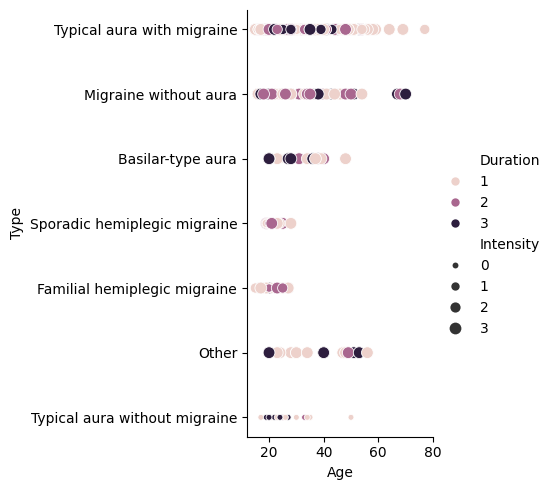

In [66]:
sns.relplot(x='Age',y='Type',kind='scatter',data=data,size='Intensity',hue='Duration')

<Axes: xlabel='Age', ylabel='Type'>

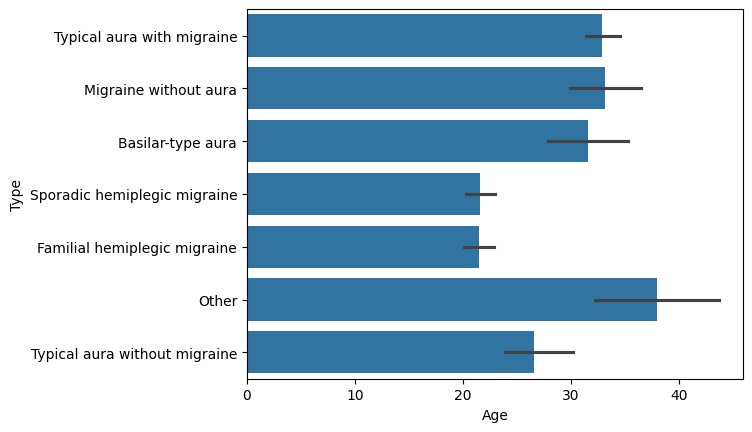

In [67]:
sns.barplot(y=data['Type'],x=data['Age'])

<Axes: xlabel='Frequency', ylabel='Type'>

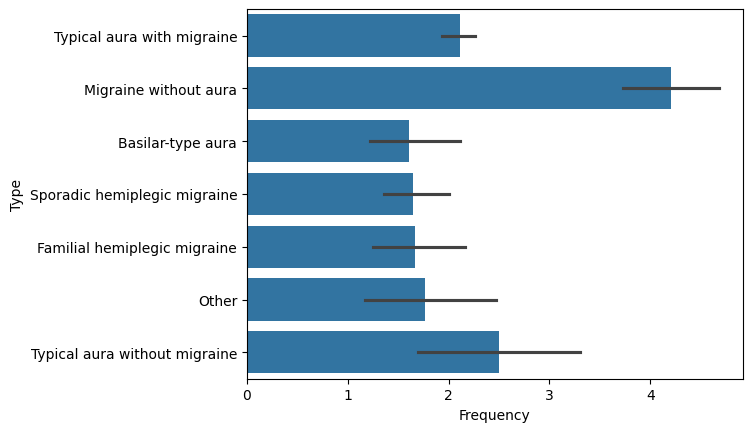

In [68]:
sns.barplot(y=data['Type'],x=data['Frequency'])

In [69]:
col = data.columns
col

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

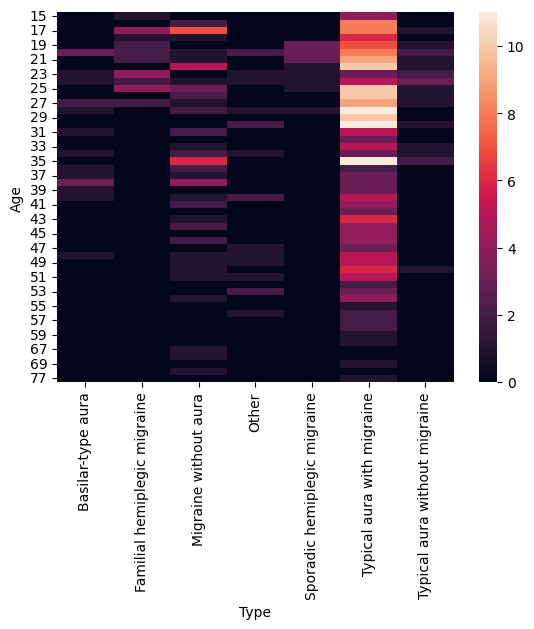

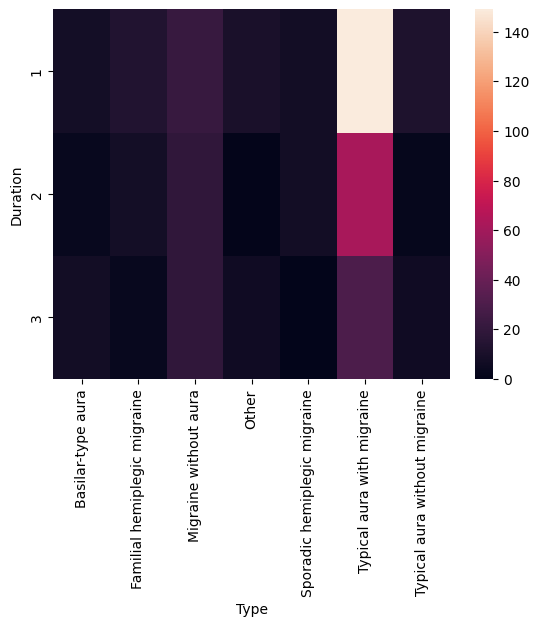

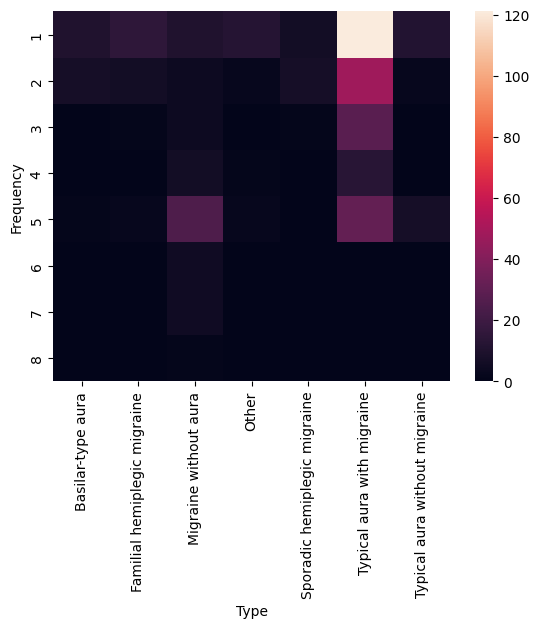

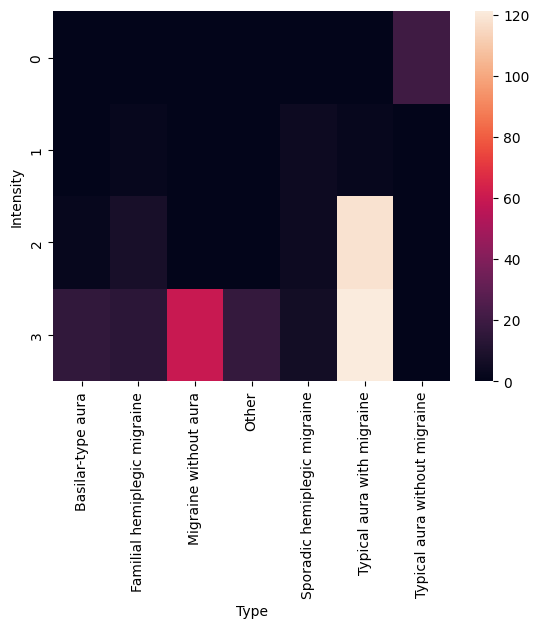

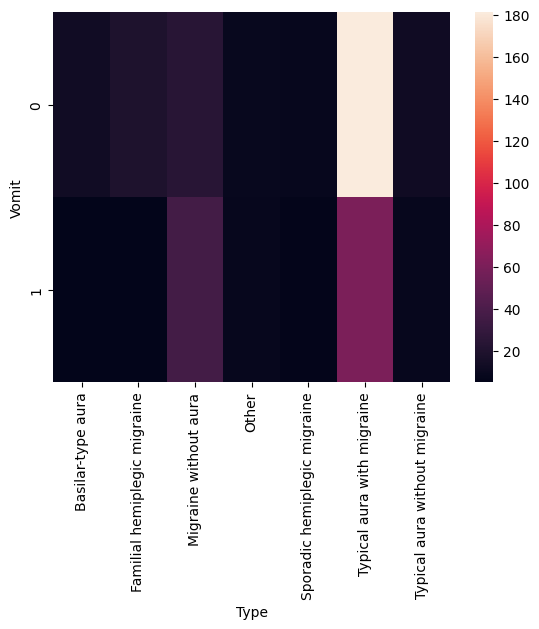

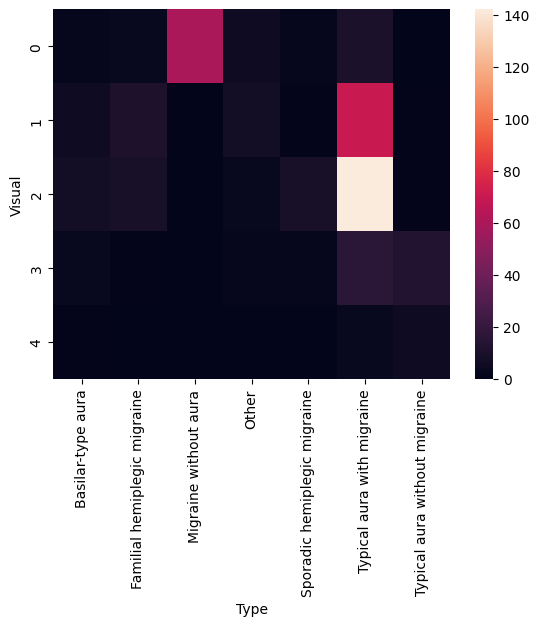

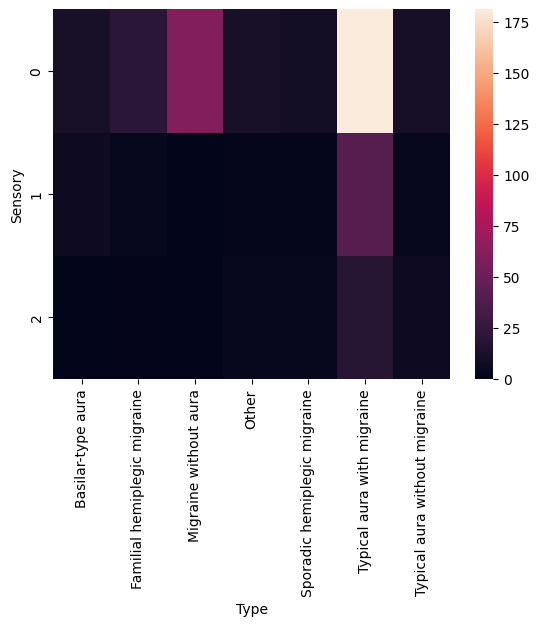

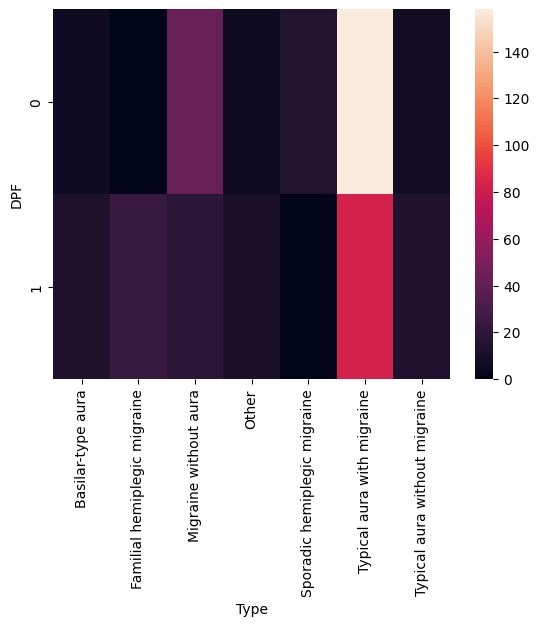

In [70]:
def heatmap_wrt_type():
    for i in col:
        if i not in ['Nausea','Location', 'Character', 'Nausea', 'Phonophobia', 'Photophobia', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect','Ataxia', 'Conscience','Paresthesia']:
            if data[i].dtype =='int64':
                sns.heatmap(pd.crosstab(data[i],data['Type']))
                plt.show()
heatmap_wrt_type()

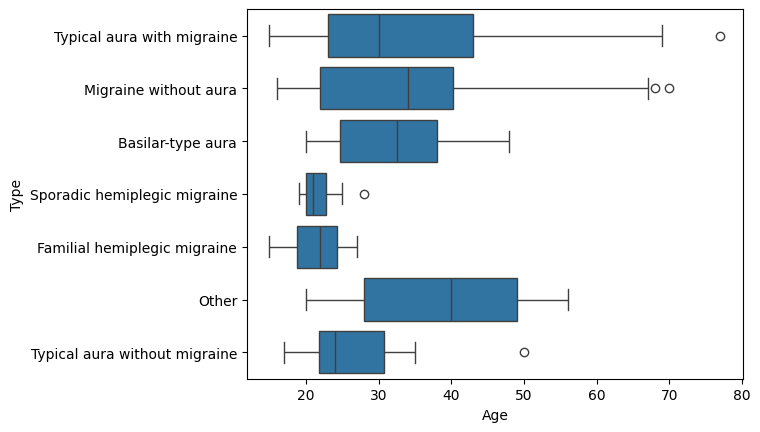

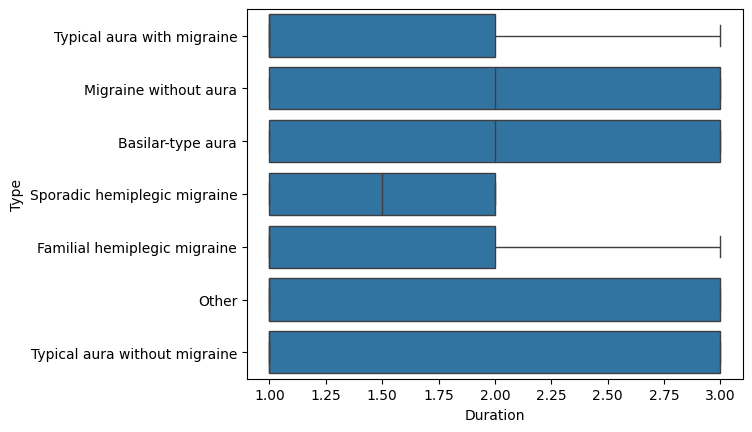

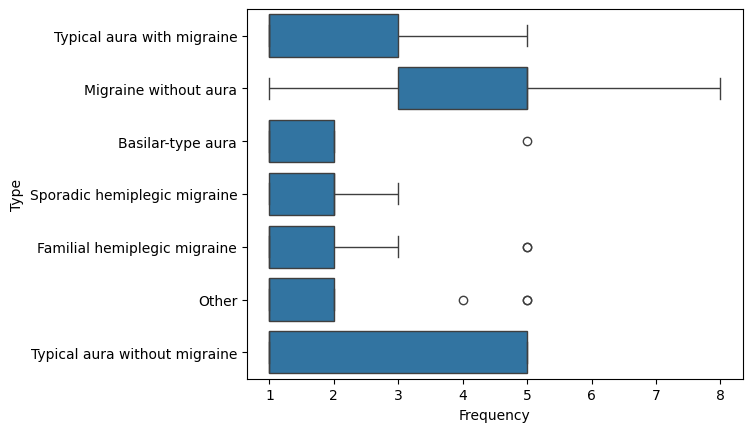

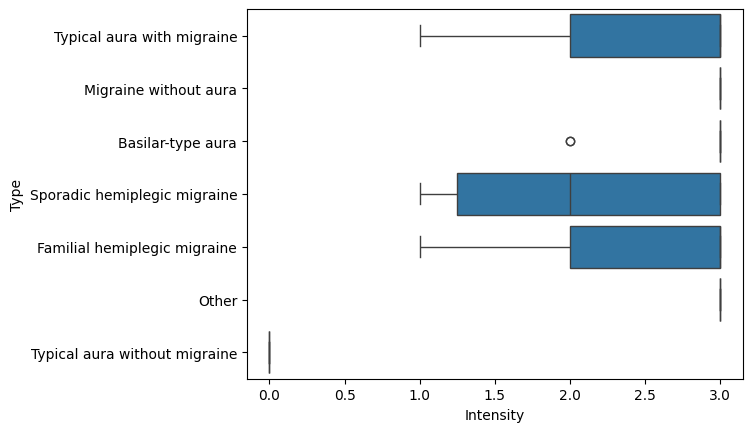

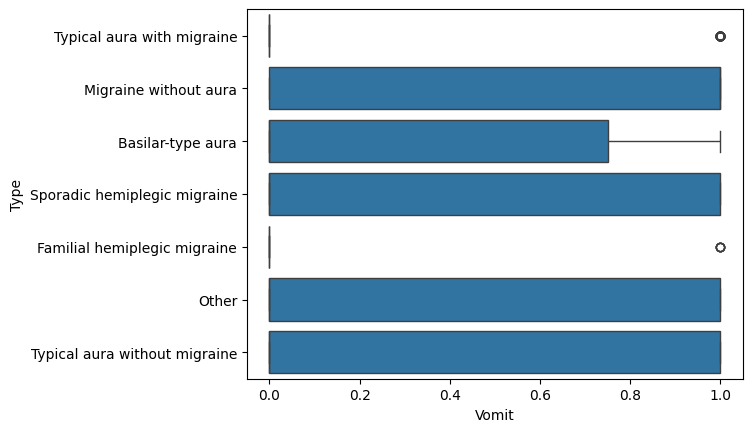

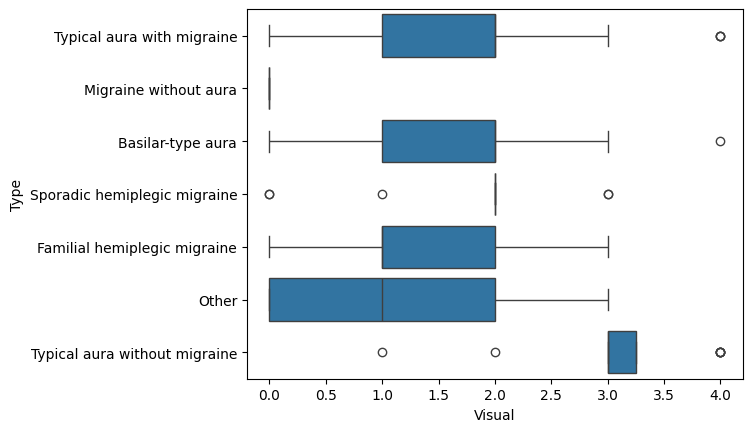

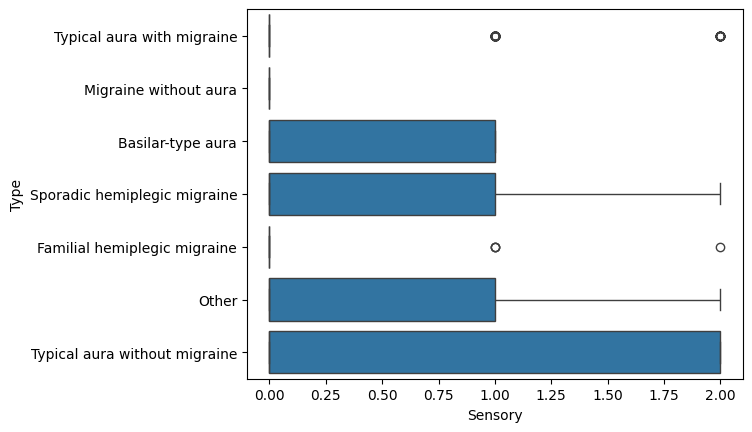

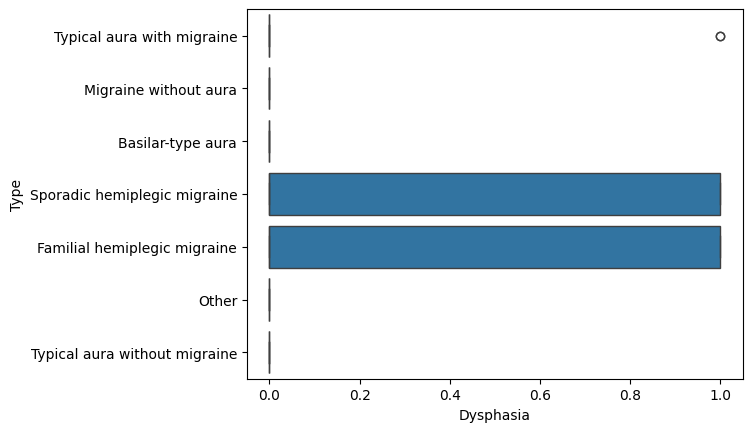

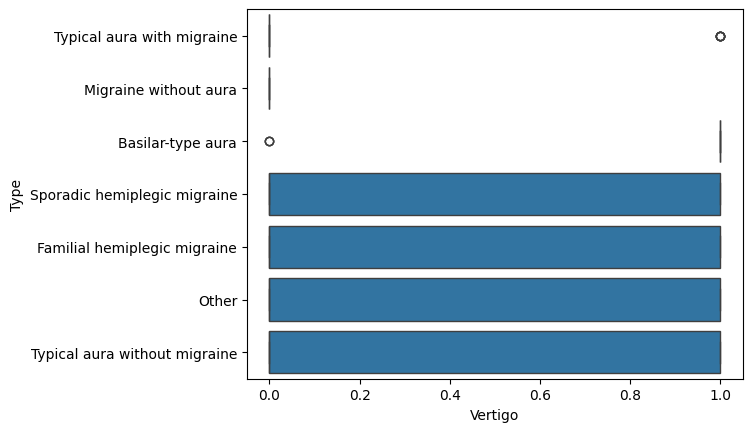

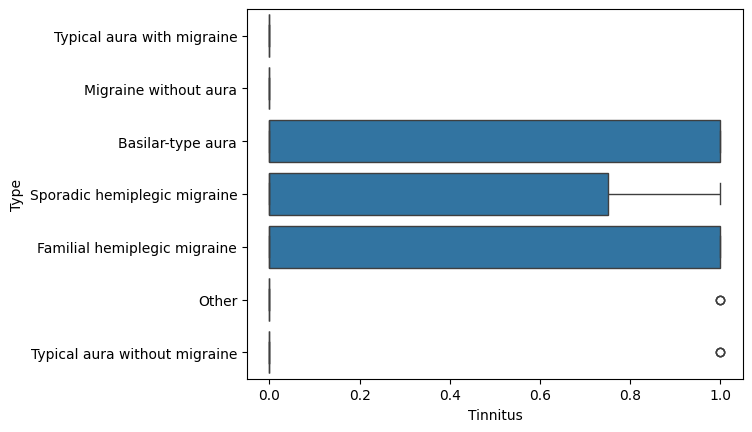

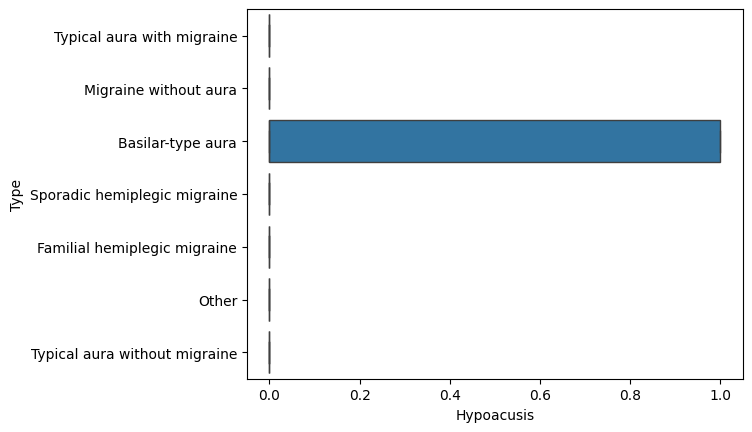

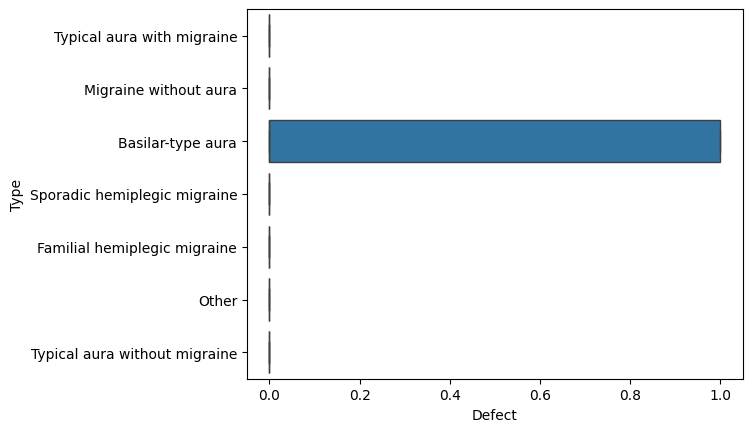

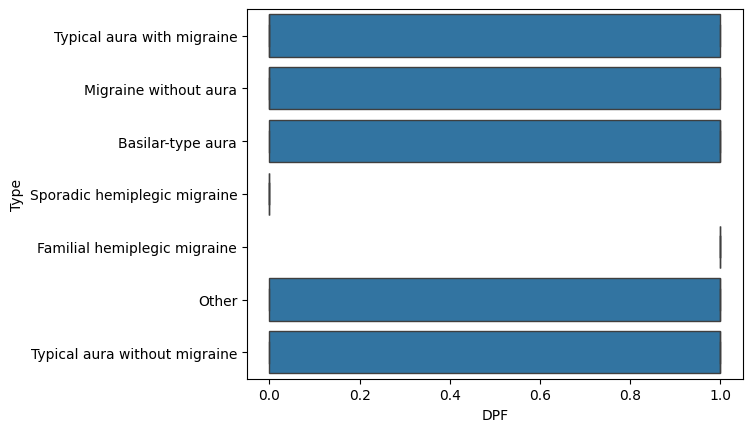

In [71]:
def boxplot_wrt_type():
    for i in col:
        if i not in ['Nausea','Location', 'Character', 'Nausea', 'Phonophobia', 'Photophobia', 'Dysarthria', 'Diplopia', 'Ataxia', 'Conscience','Paresthesia']:
            if data[i].dtype =='int64':
                sns.boxplot(x=data[i],y=data['Type'])
                plt.show()
boxplot_wrt_type()

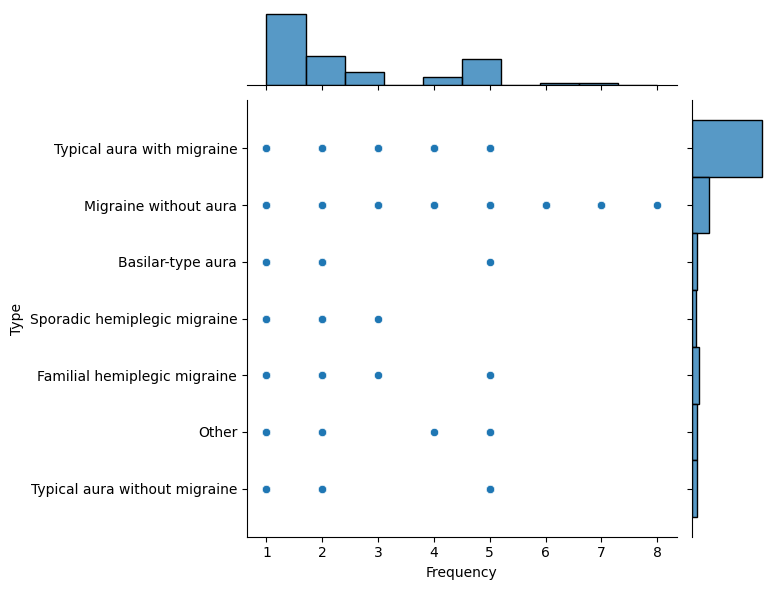

In [72]:
sns.jointplot(x='Frequency', y='Type', data=data)

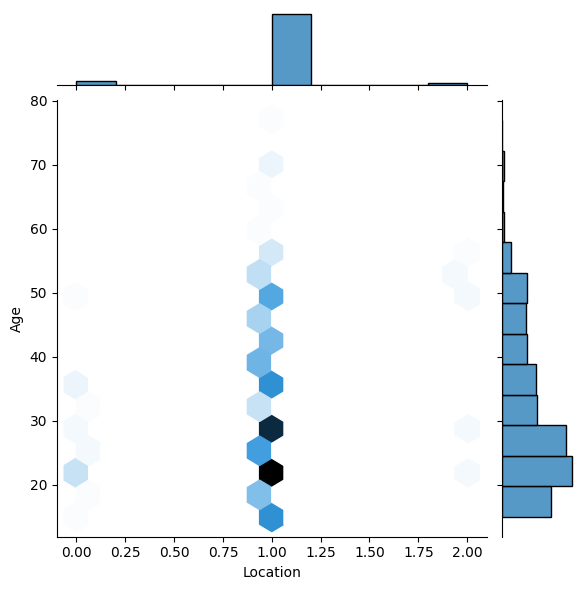

In [73]:
sns.jointplot(x='Location', y='Age', kind='hex',data=data)

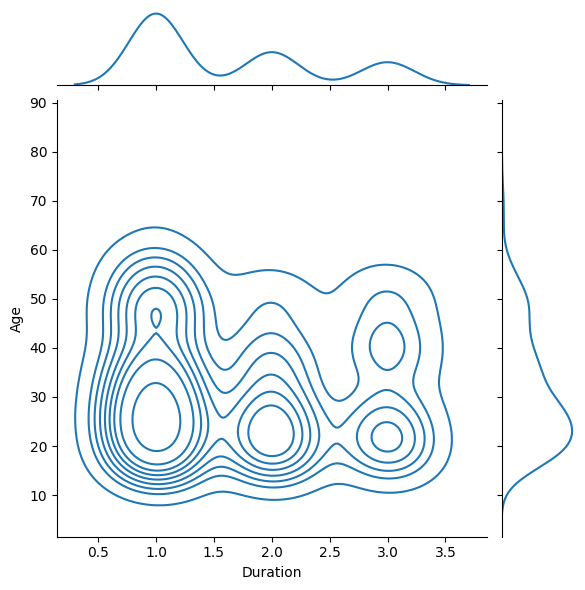

In [74]:
sns.jointplot(x='Duration', y='Age', kind='kde',data=data)

# Prediction System

# Data Splitting

In [75]:
X_t = data.drop('Type', axis=1)
X_t.head()
y_t = data[['Type']]
y_t.head()

,Type
0,Typical aura with migraine
1,Typical aura with migraine
2,Typical aura with migraine
3,Typical aura with migraine
4,Typical aura with migraine


In [76]:
X = data.iloc[:,:-1]
X.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [77]:
y = data.iloc[:,-1:]
y.head()

,Type
0,Typical aura with migraine
1,Typical aura with migraine
2,Typical aura with migraine
3,Typical aura with migraine
4,Typical aura with migraine


# Model Creation

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred = rf.predict(X_test)
y_pred[27]

'Migraine without aura'

# Model Evaluation

In [80]:
acc_score = accuracy_score(y_test,y_pred)

print("Accuracy :",acc_score)

Accuracy : 0.9240506329113924


In [81]:
print(classification_report(y_test,y_pred))

                               precision    recall  f1-score   support

            Basilar-type aura       0.60      1.00      0.75         3
 Familial hemiplegic migraine       0.00      0.00      0.00         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.40      0.57         5
 Sporadic hemiplegic migraine       0.50      0.50      0.50         2
   Typical aura with migraine       0.96      1.00      0.98        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.92        79
                    macro avg       0.71      0.70      0.68        79
                 weighted avg       0.91      0.92      0.91        79



# Model Testing

In [82]:
input_data = (22,2,3,1,1,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)

print("You have",prediction[0])

You have Migraine without aura


In [83]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

# Saving the model

In [84]:
import pickle
filename = 'migraine_trained_model.sav'
pickle.dump(rf,open(filename,'wb'))

In [85]:
loaded_model = pickle.load(open('migraine_trained_model.sav','rb'))

In [86]:
input_data = (29,3,4,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print("You have",prediction[0])

You have Migraine without aura
